In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import seaborn as sns


In [14]:
#Limpiando el dataset
df_ccd1 = pd.read_csv("CCD1")
df_ccd2 = pd.read_csv("CCD2")
df_ccd2_clean = df_ccd2.dropna()
df_ccd2_clean.head()
cond = ~df_ccd1['eventNumber'].isin(df_ccd2_clean['eventNumber'])
df_ccd1_clean = df_ccd1.drop(df_ccd1[cond].index)
cond2 = ~df_ccd2_clean['eventNumber'].isin(df_ccd1_clean['eventNumber'])
df_ccd2_clean.drop(df_ccd2_clean[cond2].index, inplace = True)
df_ccd1_clean.reset_index(inplace=True)
df_ccd2_clean.reset_index(inplace=True)
disx_ = df_ccd2_clean['X_C'] - df_ccd1_clean['X_C'].dropna()
disx = abs((df_ccd2_clean['X_C'] - df_ccd1_clean['X_C']).dropna())
#disy = (df_ccd2_clean['Y_C'] - df_ccd1_clean['Y_C']).dropna()

C:\Users\oscar\AppData\Local\Temp\ipykernel_13372\1148700380.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ccd2_clean.drop(df_ccd2_clean[cond2].index, inplace = True)


In [15]:
df_ccd1_clean.head()

,index,eventNumber,X_C,Y_C,X_size,Y_size,X_asymmetry,Y_asymmetry
0,1,15,-12058.492960,-11492.297308,156.662803,173.412517,25.674752,29.284185
1,4,20,3988.386193,12383.931442,220.576259,388.062089,35.337611,-31.822355
2,6,33,-2267.706030,-14910.669878,140.436016,249.928487,23.572448,22.602956
3,7,41,-5328.981464,-3784.845156,267.588692,173.407228,31.038813,-33.494273
4,8,44,11407.409671,-28879.129031,365.513643,265.382143,-36.551429,32.726175


In [16]:
df_ccd2_clean.head()

,index,eventNumber,X_C,Y_C,X_size,Y_size,X_asymmetry,Y_asymmetry
0,1,15,-12746.123897,-12296.351564,179.322342,182.002021,36.887976,32.411221
1,4,20,2966.185535,14752.895393,217.044841,382.057540,36.529141,-28.433051
2,6,33,-2731.661593,-16356.989173,122.585983,257.980038,20.509627,28.286581
3,7,41,-6827.305522,-3060.258604,267.997592,175.173774,30.449220,-32.155014
4,8,44,13636.234278,-30333.867846,359.975313,268.828501,-31.825472,30.005195


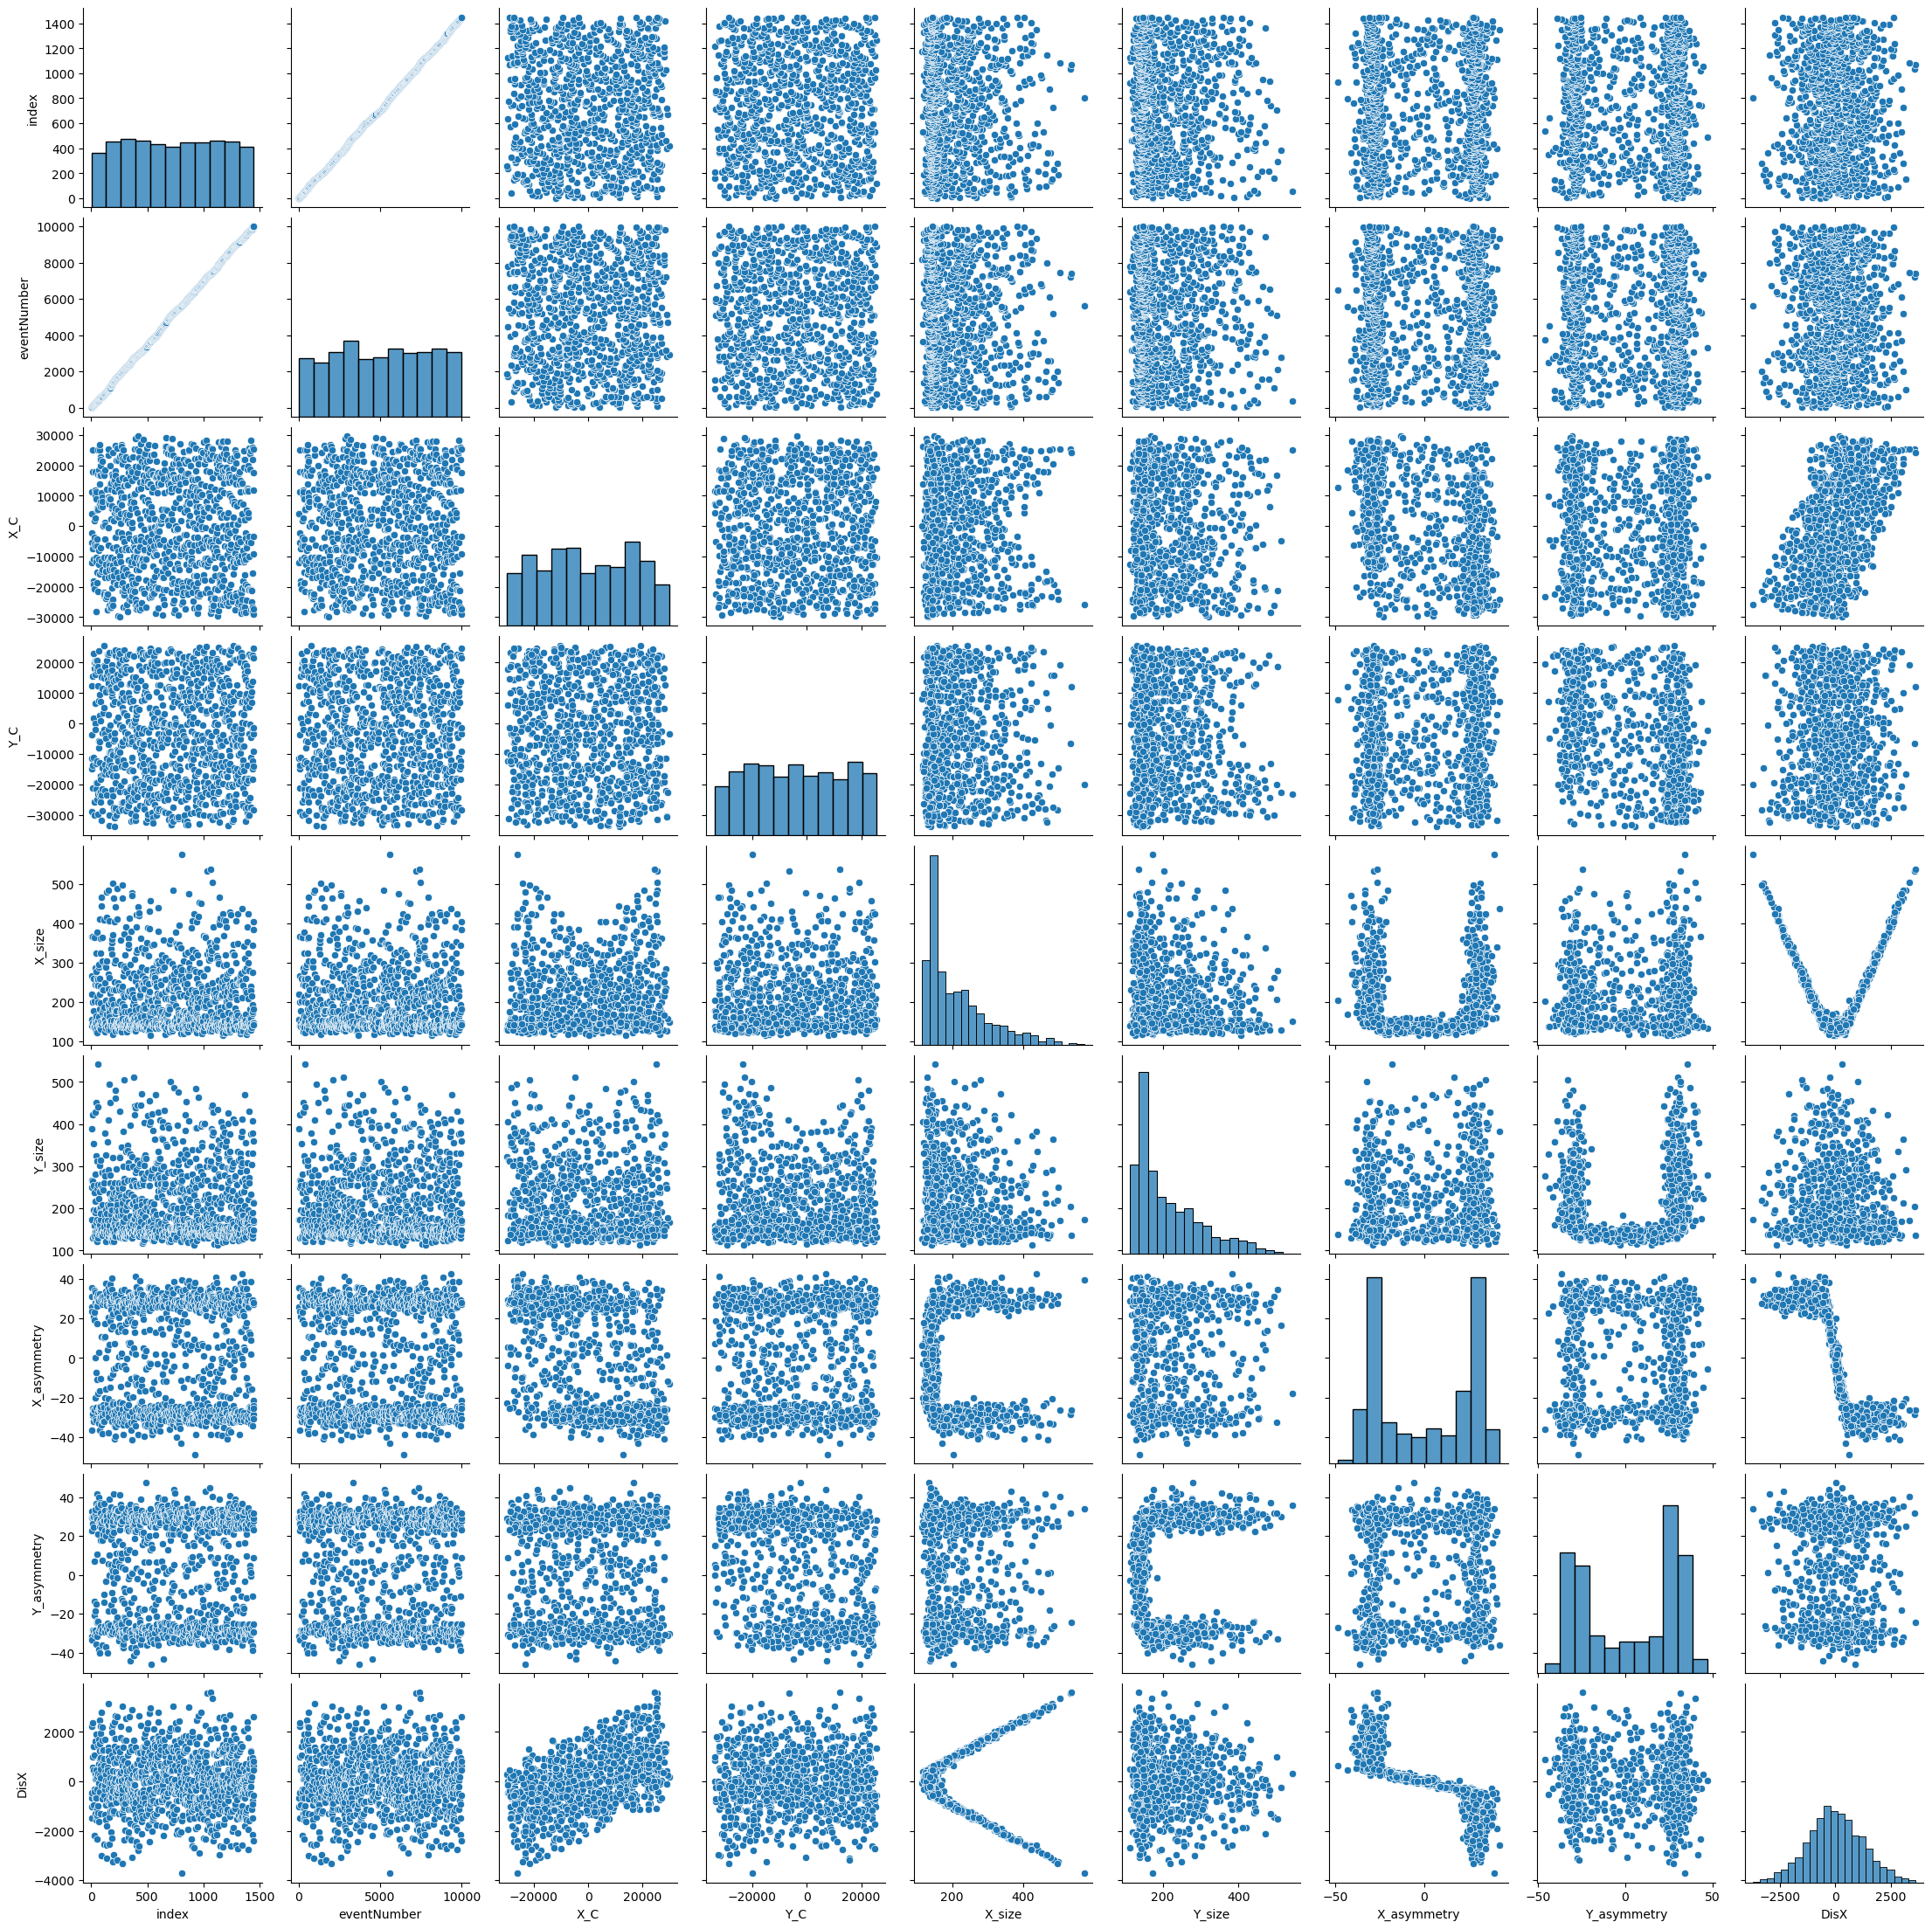

In [8]:
df_ccd1_clean['DisX'] = pd.Series(list(disx_.values), index = df_ccd1_clean.index)
g = sns.pairplot(df_ccd1_clean)

Text(0, 0.5, 'Displacement X')

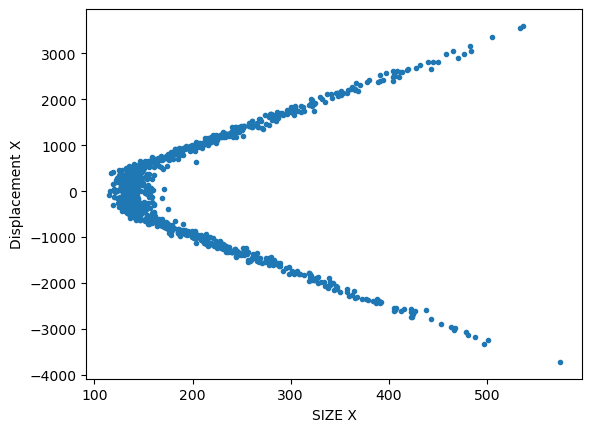

In [17]:
##Plot deltax vs sizex
plt.plot(df_ccd1_clean.X_size, disx_, marker='.', linestyle='none')
plt.xlabel('SIZE X')
plt.ylabel('Displacement X')

Text(0, 0.5, 'Displacement X')

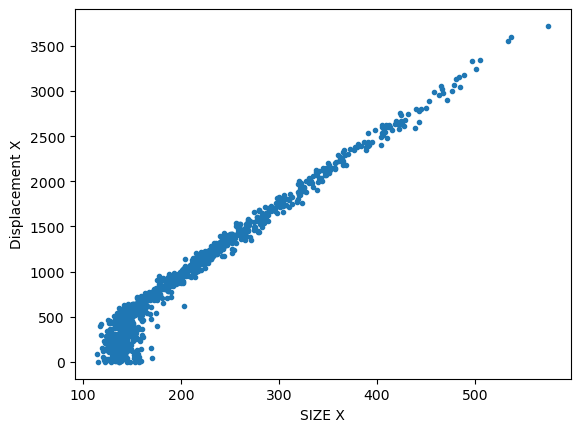

In [18]:
##Plot deltax vs sizex
plt.plot(df_ccd1_clean.X_size, disx, marker='.', linestyle='none')
plt.xlabel('SIZE X')
plt.ylabel('Displacement X')

In [ ]:
##Plot deltax vs sizex
plt.plot(df_ccd1_clean.Y_size, disy, marker='.', linestyle='none')
plt.xlabel('SIZE Y')
plt.ylabel('Displacement Y')

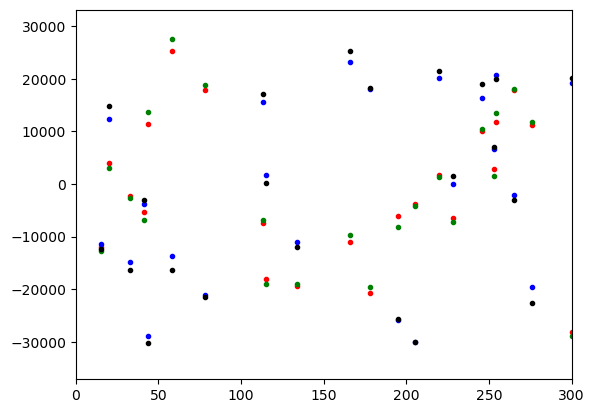

In [19]:
plt.xlim([0, 300])
plt.plot(df_ccd1_clean.eventNumber, df_ccd1_clean.X_C , marker='.', linestyle='none',color ='red')
plt.plot(df_ccd1_clean.eventNumber, df_ccd1_clean.Y_C , marker='.', linestyle='none',color ='blue')
plt.plot(df_ccd2_clean.eventNumber, df_ccd2_clean.X_C , marker='.', linestyle='none',color='green')
plt.plot(df_ccd2_clean.eventNumber, df_ccd2_clean.Y_C , marker='.', linestyle='none',color='black')


# REGRESION LINEAL

# Datos

In [20]:
#data = df_ccd1_clean[['X_C', 'Y_C']].values
#data = df_ccd1_clean[['X_C', 'X_asymmetry','X_size','Y_C', 'Y_asymmetry','Y_size']].values
#predict = df_ccd2_clean[['X_C','Y_C']].values
#data = df_ccd1_clean[['X_C','X_size']].values
data = df_ccd1_clean['X_size'].values
predict = disx.values

In [ ]:
# Build the model
model1 = Sequential()
model1.add(Dense(1, ,input_dim=1))
model1.compile(loss='mse', optimizer='adam')
model1.summary()

In [22]:
model = Sequential()
model.add(Dense(1, activation='linear' , input_shape=(1,)))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
data_train, data_test, labels_train, labels_test = train_test_split(data, predict)

In [ ]:
Y_predict = model.predict(data)

plt.plot(data, Y_predict, color='red', linewidth=3)
plt.plot(df_ccd1_clean.X_size, disx, marker='.', linestyle='none')
plt.show()

In [ ]:
history = model.fit(data_train, labels_train, epochs=2000, validation_split=0.2)

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
Y_predict = model.predict(data)

plt.plot(data, Y_predict, color='red', linewidth=3)
plt.plot(df_ccd1_clean.X_size, disx, marker='.', linestyle='none')
plt.show()

In [ ]:
model2 = Sequential()
model2.add(Dense(1, input_dim=1))
model2.compile(Adam(lr=0.8), 'mean_squared_error')
model2.fit(data_train, labels_train, epochs=1000)

31/31 [==============================] - 0s 1ms/step


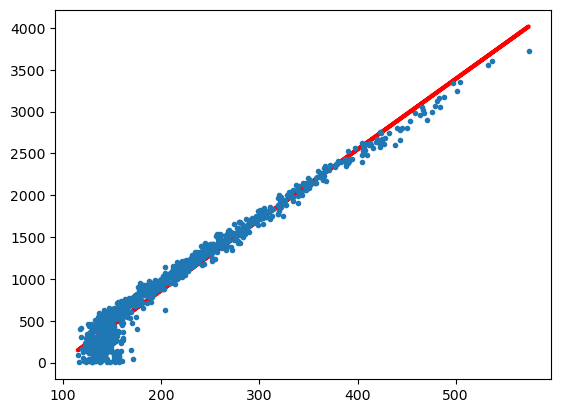

In [24]:
Y_predict_2 = model2.predict(data)

plt.plot(data, Y_predict_2, color='red', linewidth=3)
plt.plot(df_ccd1_clean.X_size, disx, marker='.', linestyle='none')
plt.show()